## WORLD HAPPINESS REPORT TOP 50
## A look into collective happiness for the Top 50 Happiest Countries in the World by Region

In [35]:
## Import Dependencies
import matplotlib.pyplot as plt
import sklearn.datasets as dta
from scipy.stats import linregress
import pandas as pd
import scipy.stats as sts
import numpy as np
import random
import os

## Create Data file Paths
whr_2017_path = "../World_Happiness_Reports/2017.csv"
region_data_path = "Region_Data.csv"

## Read WHR and region data
whr_2017_df = pd.read_csv(whr_2017_path)
region_data_df = pd.read_csv(region_data_path)

## Display the data table for preview
whr_2017_df.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [36]:
## Display the data table for preview
region_data_df.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


## Top 50 Countries

In [37]:
## Sort/cut top 50 countries
top_50_sorted_df = whr_2017_df.sort_values("Happiness.Rank", ascending=True).head(50)

## Write data to CSV
#top_50_sorted_df.to_csv('Top_50_Carolina.csv')

## Display the data table for preview
#top_50_sorted_df.head()

## Add Regions to Top 50

In [38]:
## Combine the data into a single dataset 
merged_countries_regions_df = pd.merge(top_50_sorted_df, region_data_df, left_on="Country", right_on="name")

## Write data to CSV
#merged_countries_regions_df.to_csv('merged_countries_regions.csv')

## Display the data table for preview
merged_countries_regions_df.head(10)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,...,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,...,NO,NOR,578,ISO 3166-2:NO,Europe,Northern Europe,NaN,150.0,154.0,NaN
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,...,DK,DNK,208,ISO 3166-2:DK,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,...,IS,ISL,352,ISO 3166-2:IS,Europe,Northern Europe,NaN,150.0,154.0,NaN
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,...,CH,CHE,756,ISO 3166-2:CH,Europe,Western Europe,NaN,150.0,155.0,NaN
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,...,FI,FIN,246,ISO 3166-2:FI,Europe,Northern Europe,NaN,150.0,154.0,NaN
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,...,NL,NLD,528,ISO 3166-2:NL,Europe,Western Europe,NaN,150.0,155.0,NaN
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,...,CA,CAN,124,ISO 3166-2:CA,Americas,Northern America,NaN,19.0,21.0,NaN
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,...,NZ,NZL,554,ISO 3166-2:NZ,Oceania,Australia and New Zealand,NaN,9.0,53.0,NaN
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,...,SE,SWE,752,ISO 3166-2:SE,Europe,Northern Europe,NaN,150.0,154.0,NaN
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,...,AU,AUS,36,ISO 3166-2:AU,Oceania,Australia and New Zealand,NaN,9.0,53.0,NaN


## Group Countries into Regions

In [39]:
## Drop countries 
clean_df = merged_countries_regions_df.drop(['Country'], axis=1)

## Using GroupBy Sub Region
grouped_regions_df = clean_df.groupby(['sub-region']).mean()

## Write data to CSV
#grouped_regions_df.to_csv('grouped_regions_df.csv')

## Rename Index Column
grouped_regions_df.index.name = 'Region'

## Display
#grouped_regions_df.head(5)

## Summary Statistics

In [40]:
## Happiness Scores for regions
regions_index = grouped_regions_df.index.get_level_values(0)
happiness_scores = grouped_regions_df['Happiness.Score']

# Display the data table for preview
#happiness_scores

## Sort and visualize Happiness Scores by region

In [41]:
## Sort Happiness Scores
happiness_scores = happiness_scores.sort_values(ascending=False)

## Display the data table for preview
#happiness_scores

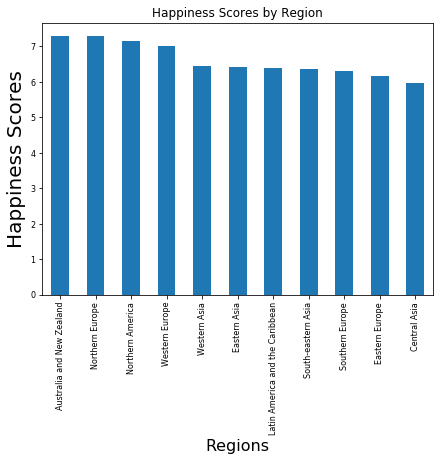

In [42]:
## Visualize data
happiness_scores.plot(kind = 'bar',figsize=(7,5), fontsize=8)
plt.title('Happiness Scores by Region', fontsize=12)
plt.xlabel('Regions', fontsize=16)
plt.ylabel('Happiness Scores', fontsize=20)
plt.show()

## Visualize Happiness Scores by Country

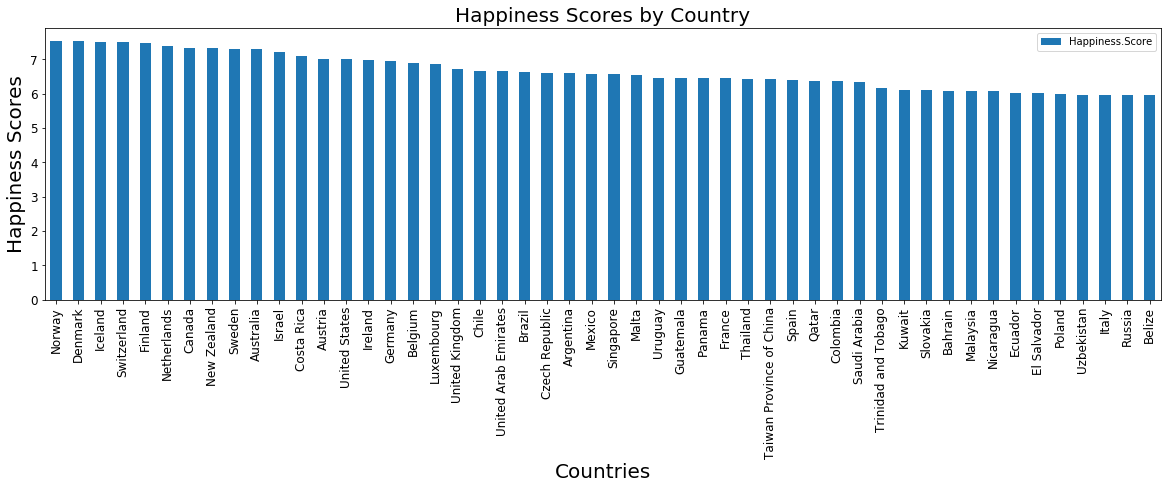

In [44]:
## Visualize data
merged_countries_regions_df.plot(x='Country',y='Happiness.Score', kind = 'bar',figsize=(20,5), fontsize=12)
plt.title('Happiness Scores by Country', fontsize=20)
plt.xlabel('Countries', fontsize=20)
plt.ylabel('Happiness Scores', fontsize=20)
plt.show()